This notebook will create 1 dataframe from all four modules
Shuffle and Randomly partition that one dataframe 

60%train:

20%validation:  This data set is used to compare the performances of the prediction algorithms that were created based 
on the training set. We choose the algorithm that has the best performance.

Models:
1. Random Forest
2. 
3.
4.

##############
20%test: Once we have chosen our preferred prediction algorithm but we don't know yet how it's going to perform on 
completely new real-world data. So, we apply our chosen prediction algorithm on our test set in order to see how 
it's going to perform so we can have an idea about our algorithm's performance on new data.
##############

### What is Cross Validation ?

In [1]:
def generateDF(featuresFile, profiledFile):
    #reads featurefiles and projects 3 columns (ppn, sizeGB, Ytime)
    #reads profiledFile (the table from profiling) and reads all 55 columns
    #generates one dataframe with 58 columns and n rows (=size of profiled data from csv)
    import pandas as pd
    from IPython.display import display

    header='ft1 ft2 ft3 ft4 ft5 ft6 ft7 ft8 ft9 ft10 ft11 ft12 ft13 ft14 ft15 ft16 ft17 \
    ft18 ft24 ft25 ft19 ft39 ft20 ft33 ft21 ft35 ft22 ft23 ft34 ft36 ft37 ft38 ft40 ft41 \
    ft42 ft43 ft44 ft45 ft46 ft48 ft47 ft49 ft51 ft50 ft52 ft53 ft54 ft55 ft26 ft27 ft28 ft29 ft30 ft31 ft32'
    
    def value(item):
        return item[item.find('=')+1:]
    
    print("Reading features from %s" % featuresFile)
    df_features = pd.read_table(featuresFile, header=None, delimiter=',',
                       converters={i:value for i in range(55)},
                       names=header.split())
    df_features = df_features.astype(float)
    #print(df_features.head(2))
    
    ################################
    #read profiledFile
    df_profiled = pd.read_csv(profiledFile)
    if 'Unnamed: 0' in df_profiled.columns:
        del df_profiled['Unnamed: 0']
    df_profiled = df_profiled.astype(float)
    rows = df_profiled.shape[0]
    
    #project columns of use
    df_profiled = df_profiled[['ppn','sizeGB','Y_time']]
    print("Reading profiled file %s\t: %s" % (profiledFile,str(df_profiled.shape)))
    
    ################################
    # create dataframe from featuresFile static program features with same #ROWs
    frames = [df_features for i in range(rows)]
    program_ft = pd.concat(frames)
    program_ft.reset_index(inplace=True)
    del program_ft['index']
    print("Shape of program static features\t\t\t\t\t: %s " % str(program_ft.shape))
    
    ################################
    # concatenate static features (55) with profiled data (3)
    ft_plus_profiled = pd.concat([df_profiled, program_ft], axis=1, join_axes=[df_profiled.index])
    ft_plus_profiled['y_time']=ft_plus_profiled['Y_time'] # so that y_time is last column
    del ft_plus_profiled['Y_time']
    print("Returning concatenated data frame (ft + profiled data)\t\t\t: %s" % str(ft_plus_profiled.shape))
    #display(ft_plus_profiled.tail(5))    
    
    return ft_plus_profiled

In [2]:
# stack two dataframes on top of each other
def stackDFs(df1, df2):
    import copy
    import pandas as pd
    
    frames = [copy.deepcopy(df1), copy.deepcopy(df2)]
    both = pd.concat(frames)
    both.reset_index(inplace=True)
    del both['index']
    return both

In [3]:
#
############################################################################################
############################################################################################
################################## cdhitdup ################################################
############################################################################################
############################################################################################
#

In [4]:
df_cdhitdup = generateDF('./features/cdhitdup_singlecmd_features.txt','./profiledcsvfiles/cdhitdup_ppn_sizeGB_Ytime.csv')
df_cdhitdup.shape

Reading features from ./features/cdhitdup_singlecmd_features.txt
Reading profiled file ./profiledcsvfiles/cdhitdup_ppn_sizeGB_Ytime.csv	: (32, 3)
Shape of program static features					: (32, 55) 
Returning concatenated data frame (ft + profiled data)			: (32, 58)


(32, 58)

In [5]:
from IPython.display import display

In [6]:
#
############################################################################################
############################################################################################
##################################### frhit ################################################
############################################################################################
############################################################################################
#

In [7]:
df_frhit = generateDF('./features/frhit_singlecmd_features.txt', './profiledcsvfiles/frhit_ppn_sizeGB_Ytime.csv')

Reading features from ./features/frhit_singlecmd_features.txt
Reading profiled file ./profiledcsvfiles/frhit_ppn_sizeGB_Ytime.csv	: (96, 3)
Shape of program static features					: (96, 55) 
Returning concatenated data frame (ft + profiled data)			: (96, 58)


In [8]:
#
############################################################################################
############################################################################################
##################################### velvetH ##############################################
############################################################################################
############################################################################################
#

In [9]:
df_hvelvetH = generateDF('./features/velveth_singlecmd_features.txt','./profiledcsvfiles/velvetH_ppn_sizeGB_Ytime.csv')

Reading features from ./features/velveth_singlecmd_features.txt
Reading profiled file ./profiledcsvfiles/velvetH_ppn_sizeGB_Ytime.csv	: (97, 3)
Shape of program static features					: (97, 55) 
Returning concatenated data frame (ft + profiled data)			: (97, 58)


In [10]:
#
############################################################################################
############################################################################################
##################################### velvetG ##############################################
############################################################################################
############################################################################################
#

In [11]:
df_gvelvetG = generateDF('./features/velvetg_singlecmd_features.txt','./profiledcsvfiles/velvetG_ppn_sizeGB_Ytime.csv')

Reading features from ./features/velvetg_singlecmd_features.txt
Reading profiled file ./profiledcsvfiles/velvetG_ppn_sizeGB_Ytime.csv	: (97, 3)
Shape of program static features					: (97, 55) 
Returning concatenated data frame (ft + profiled data)			: (97, 58)


### Stack 4 dfs: df_gvelvetG, df_hvelvetH, df_cdhitdup, df_frhit

In [12]:
import numpy as np
import pandas as pd

### Split: Train, Validation, Test Sets

In [22]:
frames = [df_cdhitdup, df_frhit, df_hvelvetH, df_gvelvetG]
result = pd.concat(frames)
result.reset_index(inplace=True)
del result['index']

In [43]:
features = result.columns[0:57]
target = [result.columns[57]]

In [83]:
import copy
data = result.dropna() # drop rows with NULLs

X = data[features]
Y = data[target].values

#check that all NULLs are dropped
np.any(np.isnan(Y))
#result.shape, data.shape

False

### 1. Random Forest

In [75]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

# Estimate the score on the entire dataset, with no missing values
for n in [100, 1000, 15000]:
    estimator = RandomForestRegressor(random_state=0, n_estimators=n)
    score     = cross_val_score(estimator, X, Y, n_jobs=-1).mean()
    print("Score with the entire dataset = %.2f" % score)

/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Score with the entire dataset = -0.35


/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Score with the entire dataset = -0.34


/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
Process ForkPoolWorker-11:
Traceback (most recent call last):
  File "/home/comet/anaconda3/lib/python3.6/mul

KeyboardInterrupt: 

In [77]:
%matplotlib inline
from sklearn.ensemble.forest import RandomForestRegressor

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
rfecv = RFECV(model, step=1, cv=10) #remove 1 feature at each step
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12, 15))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

/home/comet/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Automatically created module for IPython interactive environment


/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [78]:
from sklearn.cross_validation import train_test_split

#copy from ft_all
ft0 =result.copy(deep=True)

#shuffle
ft1 =ft0.iloc[np.random.permutation(len(ft0))]
ft2  =ft1.reset_index(drop=True)
ft2.head(2)

,ppn,sizeGB,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,...,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32,y_time
0,11.0,0.781250,2301.0,833.0,979.0,14.0,1428.0,503.0,132.0,631.0,...,1295.0,22.0,88.28,195.57,224.0,347.0,1492.0,13.0,558.0,218.82
1,11.0,0.003906,2286.0,985.0,973.0,24.0,1436.0,577.0,113.0,778.0,...,2007.0,5.0,126.11,152.59,223.0,458.0,1445.0,0.0,681.0,2472.15


In [80]:

ft_subset, validationSet = train_test_split(ft2, test_size = 0.1)
ft = ft_subset.copy(deep=True)

ft.shape, validationSet.shape, result.shape

((289, 58), (33, 58), (322, 58))

Automatically created module for IPython interactive environment


/home/comet/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 2


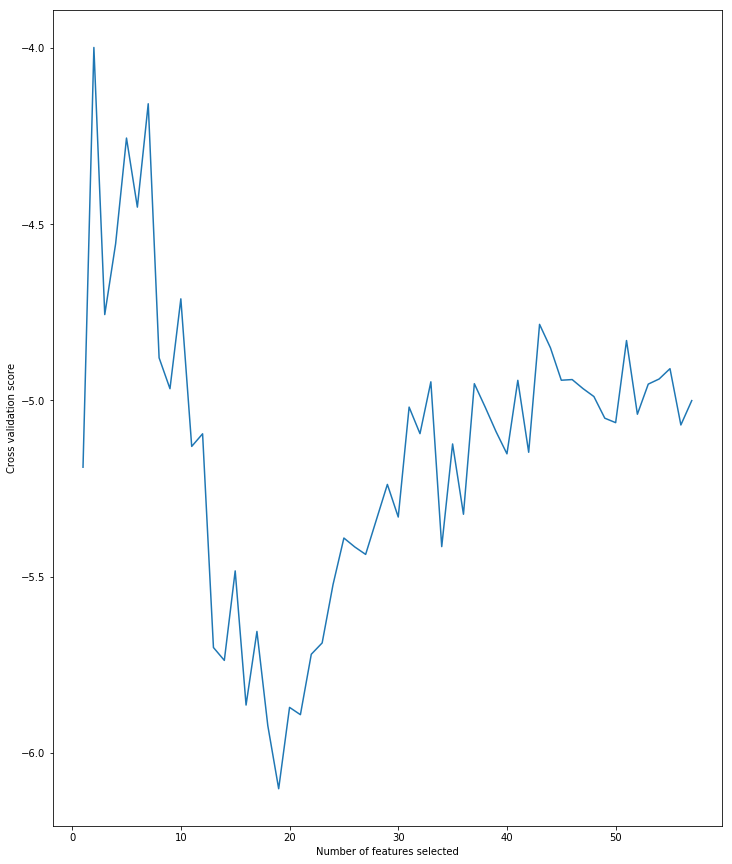

In [84]:
#Perform RFECV on ft and use validationSet for calculating rmse

%matplotlib inline
from sklearn.ensemble.forest import RandomForestRegressor

print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

data = result.dropna().copy(deep=True) #ft_all = ft + validationSet 
X = data[features]
y = data[target].values

model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
rfecv = RFECV(model, step=1, cv=10) #remove 1 feature at each step
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12, 15))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [85]:
rfecv.n_features_

2

In [86]:
X.columns[rfecv.support_]

Index(['sizeGB', 'ft41'], dtype='object')

In [87]:
X_val = validationSet[features]
y_val = validationSet[target].values

rfecv.score(X_val, y_val) #Reduce X to the selected features and then return the score of the underlying estimator.

0.99471926072896877

In [88]:
y_predict = rfecv.predict(X_val) #Reduce X to the selected features and then predict using the underlying estimator.

from sklearn.metrics import mean_squared_error

rmse_rfecv = np.sqrt(mean_squared_error(y_val, y_predict))
rmse_rfecv

75.065594217553183